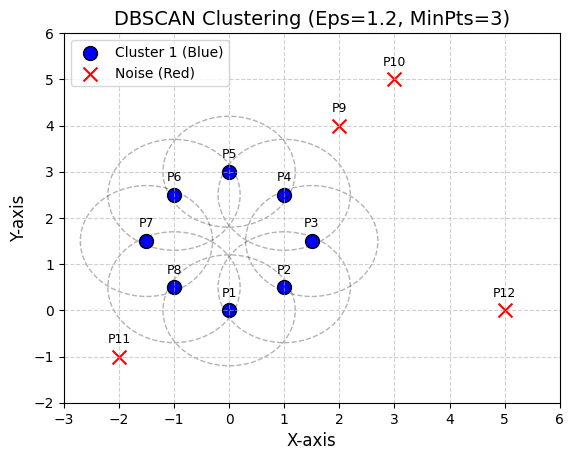

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

points = [
    {'name': 'P1', 'coords': (0, 0), 'cluster': 0},
    {'name': 'P2', 'coords': (1, 0.5), 'cluster': 0},
    {'name': 'P3', 'coords': (1.5, 1.5), 'cluster': 0},
    {'name': 'P4', 'coords': (1, 2.5), 'cluster': 0},
    {'name': 'P5', 'coords': (0, 3), 'cluster': 0},
    {'name': 'P6', 'coords': (-1, 2.5), 'cluster': 0},
    {'name': 'P7', 'coords': (-1.5, 1.5), 'cluster': 0},
    {'name': 'P8', 'coords': (-1, 0.5), 'cluster': 0},
    {'name': 'P9', 'coords': (2, 4), 'cluster': -1},
    {'name': 'P10', 'coords': (3, 5), 'cluster': -1},
    {'name': 'P11', 'coords': (-2, -1), 'cluster': -1},
    {'name': 'P12', 'coords': (5, 0), 'cluster': -1},
]

cluster0 = [p for p in points if p['cluster'] == 0]
noise = [p for p in points if p['cluster'] == -1]

plt.scatter([p['coords'][0] for p in cluster0],
            [p['coords'][1] for p in cluster0],
            c='blue', s=100, edgecolors='black', label='Cluster 1 (Blue)')

plt.scatter([p['coords'][0] for p in noise],
            [p['coords'][1] for p in noise],
            c='red', marker='x', s=100, label='Noise (Red)')

for p in points:
    if p['cluster'] != -1:
        circle = plt.Circle((p['coords'][0], p['coords'][1]), 1.2, color='black', fill=False, linestyle='--', alpha=0.3)
        plt.gca().add_patch(circle)

for p in points:
    plt.annotate(p['name'], [p['coords'][0], p['coords'][1]], textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9)

plt.xlim(-3, 6)
plt.ylim(-2, 6)
plt.title('DBSCAN Clustering (Eps=1.2, MinPts=3)', fontsize=14)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.show()

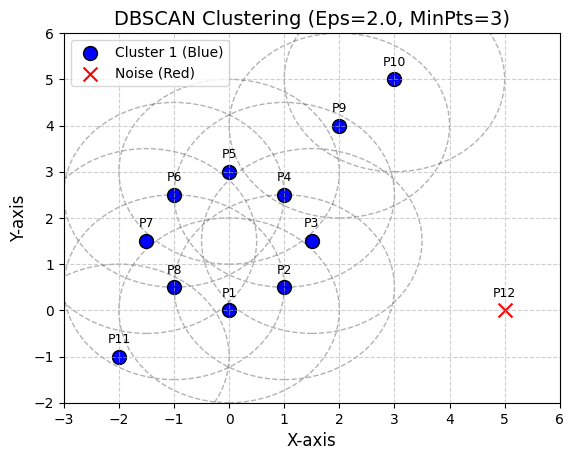

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

points = [
    {'name': 'P1', 'coords': (0, 0)},
    {'name': 'P2', 'coords': (1, 0.5)},
    {'name': 'P3', 'coords': (1.5, 1.5)},
    {'name': 'P4', 'coords': (1, 2.5)},
    {'name': 'P5', 'coords': (0, 3)},
    {'name': 'P6', 'coords': (-1, 2.5)},
    {'name': 'P7', 'coords': (-1.5, 1.5)},
    {'name': 'P8', 'coords': (-1, 0.5)},
    {'name': 'P9', 'coords': (2, 4)},
    {'name': 'P10', 'coords': (3, 5)},
    {'name': 'P11', 'coords': (-2, -1)},
    {'name': 'P12', 'coords': (5, 0)},
]

coords = [p['coords'] for p in points]

db = DBSCAN(eps=2.0, min_samples=3).fit(coords)
labels = db.labels_

for i, p in enumerate(points):
    p['cluster'] = labels[i]

cluster0 = [p for p in points if p['cluster'] == 0]
noise = [p for p in points if p['cluster'] == -1]

plt.scatter([p['coords'][0] for p in cluster0],
            [p['coords'][1] for p in cluster0],
            c='blue', s=100, edgecolors='black', label='Cluster 1 (Blue)')

plt.scatter([p['coords'][0] for p in noise],
            [p['coords'][1] for p in noise],
            c='red', marker='x', s=100, label='Noise (Red)')

for p in points:
    if p['cluster'] != -1:
        circle = plt.Circle((p['coords'][0], p['coords'][1]), 2.0, color='black', fill=False, linestyle='--', alpha=0.3)
        plt.gca().add_patch(circle)

for p in points:
    plt.annotate(p['name'], [p['coords'][0], p['coords'][1]], textcoords="offset points", xytext=(0, 10), ha='center', fontsize=9)

plt.xlim(-3, 6)
plt.ylim(-2, 6)
plt.title('DBSCAN Clustering (Eps=2.0, MinPts=3)', fontsize=14)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.show()

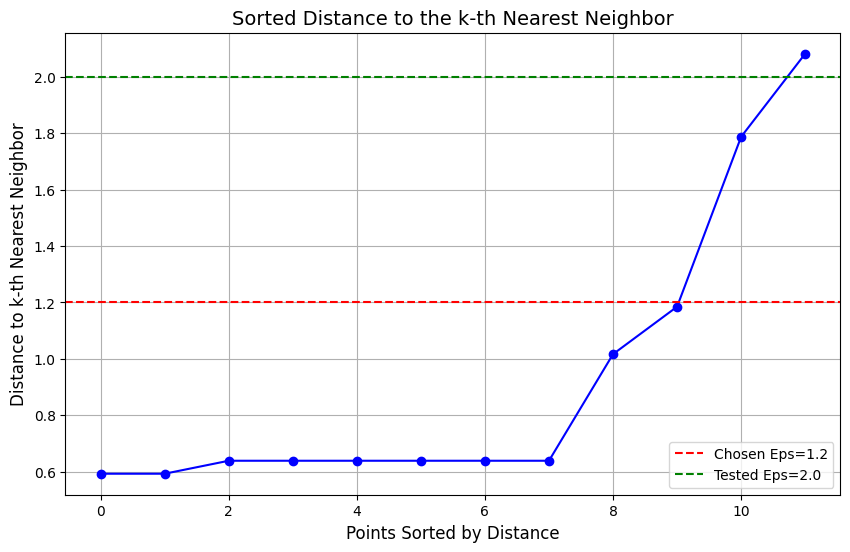

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


data = np.array([
    [0, 0],
    [1, 0.5],
    [1.5, 1.5],
    [1, 2.5],
    [0, 3],
    [-1, 2.5],
    [-1.5, 1.5],
    [-1, 0.5],
    [2, 4],
    [3, 5],
    [-2, -1],
    [5, 0]
])

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

k = 3
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(data_scaled)
distances, indices = neigh.kneighbors(data_scaled)

kth_distances = distances[:, -1]

sorted_distances = np.sort(kth_distances)

plt.figure(figsize=(10, 6))
plt.plot(sorted_distances, marker='o', linestyle='-', color='b')
plt.title('Sorted Distance to the k-th Nearest Neighbor', fontsize=14)
plt.xlabel('Points Sorted by Distance', fontsize=12)
plt.ylabel('Distance to k-th Nearest Neighbor', fontsize=12)
plt.axhline(y=1.2, color='r', linestyle='--', label='Chosen Eps=1.2')
plt.axhline(y=2.0, color='g', linestyle='--', label='Tested Eps=2.0')
plt.legend()
plt.grid(True)
plt.show()